## Instalacion de Librerias

Si no posees estas librerias al trabajar en tu entorno de desarrollo o editor de código, instalalas.

Recomiendo el uso de python 3.8 o version compatible con Tensorflow.

In [ ]:
# pip install numpy

In [ ]:
# pip install tensorflow

In [ ]:
# pip install keras

In [ ]:
# pip install matplotlib

## Importar Librerías

In [23]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Carga de los datos para entrenamiento y datos para la prueba

In [24]:
(train_data, train_labels), (test_data,test_labels) = mnist.load_data()

In [25]:
train_data.shape

(60000, 28, 28)

In [26]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

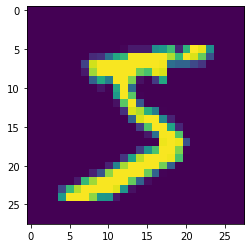

In [27]:
plt.imshow(train_data[0])

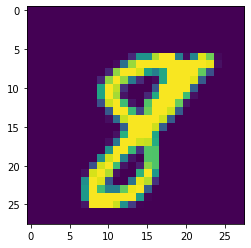

In [28]:
plt.imshow(train_data[55])

## Comienza la magia del aprendizaje profundo

Creamos un modelo secuencial para un simple modelo de capas con exactamente un tesnor de salida y uno de entrada.

In [29]:
model = models.Sequential()

512 redes neuronales de trabajo interno y diez redes neuronales de salida.

In [30]:
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [31]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [34]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

In [35]:
x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [36]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [37]:
train_labels[0]

5

In [38]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Entrenamiento de la Red Neuronal

In [39]:
model.fit(x_train,y_train,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2570 - accuracy: 0.9253
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 0.1040 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0693 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0505 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0378 - accuracy: 0.9888


## Prueba de la Red Neuronal

In [40]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0674 - accuracy: 0.9779


[0.06737209111452103, 0.9779000282287598]